In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[-0.88086422, -5.19529271],
       [-0.5740141 , -2.90070373],
       [-0.89598374,  0.39059377],
       ...,
       [-0.86850531, -3.43429946],
       [-0.94691597, -6.68061515],
       [-0.93118791, -3.40310406]], shape=(1000, 2))

In [4]:
y

array([1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 2,
       1, 0, 2, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 1, 0, 0,
       0, 0, 0, 2, 2, 1, 1, 1, 0, 2, 2, 0, 1, 0, 0, 0, 1, 0, 2, 2, 1, 1,
       2, 0, 1, 0, 2, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 2, 0, 1, 2, 1, 1, 0, 1,
       2, 0, 0, 1, 1, 0, 2, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0,
       0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 1,
       2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 2, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 2,
       0, 0, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 0,
       0, 2, 1, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 2,
       0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 2,

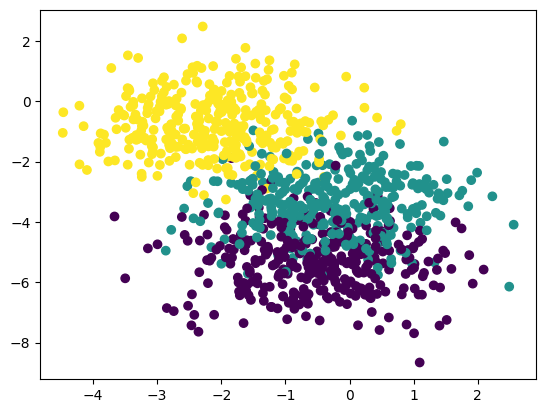

In [7]:
plt.scatter(X[:,0],X[:,1], c=y)

In [9]:
scaler = StandardScaler()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [11]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [13]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [14]:
wcss

[1340.0,
 598.5398310710057,
 437.34857080598215,
 336.8071362178076,
 275.4885171189362,
 236.68190430899617,
 210.10938180428502,
 188.46890770223993,
 155.98930308654195,
 142.97523846566756]

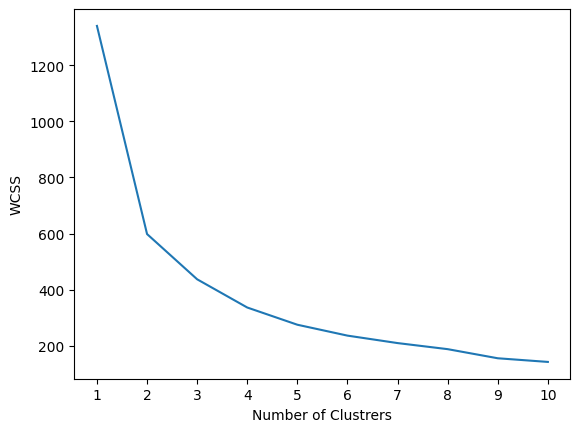

In [15]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [16]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [17]:
kmeans.fit_predict(X_train_scaled)

array([1, 2, 2, 0, 1, 2, 2, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 1, 1, 2, 1, 0, 1, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1,
       0, 0, 1, 2, 2, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 1, 1, 2, 0, 1, 2,
       1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 2, 2, 2, 0, 1, 1, 2, 1, 0, 1, 0, 2, 2, 0, 2, 0, 2, 1, 2,
       1, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 2, 2, 0, 0, 1, 2, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1,
       2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 0, 0, 2, 1, 1, 0, 0, 2,
       1, 1, 1, 0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 2, 1, 0, 2, 2,
       1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 1, 0, 2, 0, 1,
       1, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 0,
       2, 0, 2, 1, 1, 2, 2, 2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 1,
       0, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2,

In [18]:
y_pred=kmeans.predict(X_test_scaled)

In [19]:
y_pred

array([0, 1, 0, 1, 2, 1, 0, 1, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1, 2, 2, 1, 2, 1,
       1, 2, 0, 1, 1, 1, 2, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 2, 1, 1,
       2, 1, 1, 2, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 2, 1, 1, 1, 0, 0, 0, 2, 0, 2, 2, 1, 2, 1, 0, 2, 1, 2, 2, 0, 2,
       0, 2, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 2, 1, 1, 0, 2, 2, 1, 2,
       2, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 0, 2,
       2, 2, 0, 2, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 1, 1, 2, 0,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 2, 0, 2, 1, 2, 1, 1, 2, 2,
       2, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 2, 1, 0, 2, 0, 1, 1, 2, 2,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 2,
       2, 1, 2, 2, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 0, 2,
       0, 0, 2, 2, 0, 0, 1, 2, 2, 2, 1, 1, 0, 1, 2,

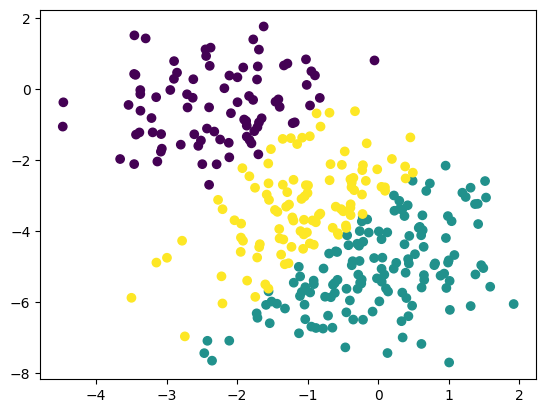

In [20]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [22]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [23]:
silhouette_coefficients

[np.float64(0.4792865201646994),
 np.float64(0.3951121819756812),
 np.float64(0.363133879688134),
 np.float64(0.3366203442657843),
 np.float64(0.3286370133031589),
 np.float64(0.32407011788450446),
 np.float64(0.34676911156549245),
 np.float64(0.3414520546960298),
 np.float64(0.3262258692874594)]

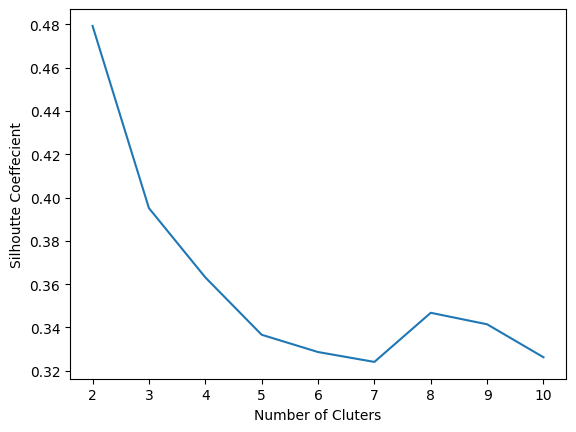

In [24]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

In [26]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [27]:
kl.elbow

np.int64(3)